In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
## Generating data
X,Y = make_blobs(n_samples=500, n_features=2,centers=2, random_state=10)
print(X.shape,Y.shape)

(500, 2) (500,)


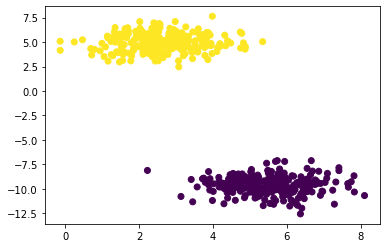

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
## Model and helper functions


In [8]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [9]:
sigmoid(5)

0.9933071490757153

In [10]:
#implement perceptron learning algorithm 
# 1. Learn the weights
# 2. Reduce the loss
# 3. Make the predictions = sigmoid(z), z = Wt.X

In [16]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """ Binary cross entropy i.e log loss"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """ Perform Update for one epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    
    return weights 

    
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    
    weights =np.zeros(X.shape[1])
    
    # Iterate and make updates
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    
    return weights
            
    
    
    

In [17]:
train(X,Y)

Epoch 0 Loss 0.0006
Epoch 10 Loss 0.0005
Epoch 20 Loss 0.0005
Epoch 30 Loss 0.0005
Epoch 40 Loss 0.0005
Epoch 50 Loss 0.0004
Epoch 60 Loss 0.0004
Epoch 70 Loss 0.0004
Epoch 80 Loss 0.0004
Epoch 90 Loss 0.0004


array([ 0.02204952, -0.30768518,  1.90003958])

In [26]:
weights =  train(X,Y,maxEpochs=500)
print(weights)

Epoch 0 Loss 0.0006
Epoch 10 Loss 0.0005
Epoch 20 Loss 0.0005
Epoch 30 Loss 0.0005
Epoch 40 Loss 0.0005
Epoch 50 Loss 0.0004
Epoch 60 Loss 0.0004
Epoch 70 Loss 0.0004
Epoch 80 Loss 0.0004
Epoch 90 Loss 0.0004
Epoch 100 Loss 0.0004
Epoch 110 Loss 0.0003
Epoch 120 Loss 0.0003
Epoch 130 Loss 0.0003
Epoch 140 Loss 0.0003
Epoch 150 Loss 0.0003
Epoch 160 Loss 0.0003
Epoch 170 Loss 0.0003
Epoch 180 Loss 0.0003
Epoch 190 Loss 0.0003
Epoch 200 Loss 0.0003
Epoch 210 Loss 0.0003
Epoch 220 Loss 0.0002
Epoch 230 Loss 0.0002
Epoch 240 Loss 0.0002
Epoch 250 Loss 0.0002
Epoch 260 Loss 0.0002
Epoch 270 Loss 0.0002
Epoch 280 Loss 0.0002
Epoch 290 Loss 0.0002
Epoch 300 Loss 0.0002
Epoch 310 Loss 0.0002
Epoch 320 Loss 0.0002
Epoch 330 Loss 0.0002
Epoch 340 Loss 0.0002
Epoch 350 Loss 0.0002
Epoch 360 Loss 0.0002
Epoch 370 Loss 0.0002
Epoch 380 Loss 0.0002
Epoch 390 Loss 0.0002
Epoch 400 Loss 0.0002
Epoch 410 Loss 0.0002
Epoch 420 Loss 0.0002
Epoch 430 Loss 0.0002
Epoch 440 Loss 0.0002
Epoch 450 Loss 0.0002

In [20]:
# loss is less because dataset is linearly seperable

In [21]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labesl[probs>=.5] = 1
        return labels

In [29]:
x1 = np.linspace(-8,8,40)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-8.         -7.58974359 -7.17948718 -6.76923077 -6.35897436 -5.94871795
 -5.53846154 -5.12820513 -4.71794872 -4.30769231 -3.8974359  -3.48717949
 -3.07692308 -2.66666667 -2.25641026 -1.84615385 -1.43589744 -1.02564103
 -0.61538462 -0.20512821  0.20512821  0.61538462  1.02564103  1.43589744
  1.84615385  2.25641026  2.66666667  3.07692308  3.48717949  3.8974359
  4.30769231  4.71794872  5.12820513  5.53846154  5.94871795  6.35897436
  6.76923077  7.17948718  7.58974359  8.        ]
[-0.7800587  -0.74169261 -0.70332652 -0.66496042 -0.62659433 -0.58822824
 -0.54986214 -0.51149605 -0.47312996 -0.43476386 -0.39639777 -0.35803167
 -0.31966558 -0.28129949 -0.24293339 -0.2045673  -0.16620121 -0.12783511
 -0.08946902 -0.05110293 -0.01273683  0.02562926  0.06399535  0.10236145
  0.14072754  0.17909363  0.21745973  0.25582582  0.29419191  0.33255801
  0.3709241   0.4092902   0.44765629  0.48602238  0.52438848  0.56275457
  0.60112066  0.63948676  0.67785285  0.71621894]


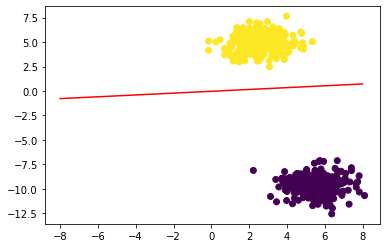

In [30]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.plot(x1,x2,c = "red")
plt.show()